Установка необходимых библиотек

In [ ]:
!pip install inference_sdk
!pip install roboflow
!pip install opencv-python
!pip install supervision

Загружаем картинку (тут вам нужно загрузить свою картинку)

In [ ]:
from google.colab import files

# Отображаем диалог загрузки файла
uploaded = files.upload()

# Берем только первый (или единственный) файл и сохраняем его как your_image.jpg
for filename in uploaded:
    with open("your_image.jpg", "wb") as f:
        f.write(uploaded[filename])
    break  # Прерываем после обработки первого файла

print("Файл успешно сохранен как your_image.jpg.")


Чтобы все работало в ключ вам нужно вставить ваш api key

In [ ]:
from inference_sdk import InferenceHTTPClient

CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="ВАШ КЛЮЧ"
)
image_path = "your_image.jpg"
result = CLIENT.infer("your_image.jpg", model_id="face-mask-detection-jmxdf-wcssx/1")

In [ ]:
print(result)

{'inference_id': '778d091d-a551-4152-bb60-17e55ea4fa4a', 'time': 0.06035552600042138, 'image': {'width': 1476, 'height': 830}, 'predictions': [{'x': 390.0, 'y': 216.5, 'width': 186.0, 'height': 245.0, 'confidence': 0.8722826242446899, 'class': 'mask_weared_incorrect', 'class_id': 6, 'detection_id': '9c9e8221-d5c7-47bb-ad7d-da7a506491a5'}, {'x': 942.5, 'y': 379.5, 'width': 115.0, 'height': 141.0, 'confidence': 0.8666578531265259, 'class': 'with_mask', 'class_id': 12, 'detection_id': '11e60352-856f-41aa-8d75-11bfb2cea5b5'}, {'x': 1325.5, 'y': 383.5, 'width': 97.0, 'height': 117.0, 'confidence': 0.8392183780670166, 'class': 'with_mask', 'class_id': 12, 'detection_id': '48986a29-0ba2-4a61-a444-8bec5558917b'}, {'x': 799.0, 'y': 369.5, 'width': 112.0, 'height': 143.0, 'confidence': 0.8369576334953308, 'class': 'with_mask', 'class_id': 12, 'detection_id': '27fe039a-93b0-439f-8fb8-2a58e7a38dfc'}, {'x': 1194.5, 'y': 336.0, 'width': 155.0, 'height': 210.0, 'confidence': 0.8322584629058838, 'clas

Нарисуем найденный объект

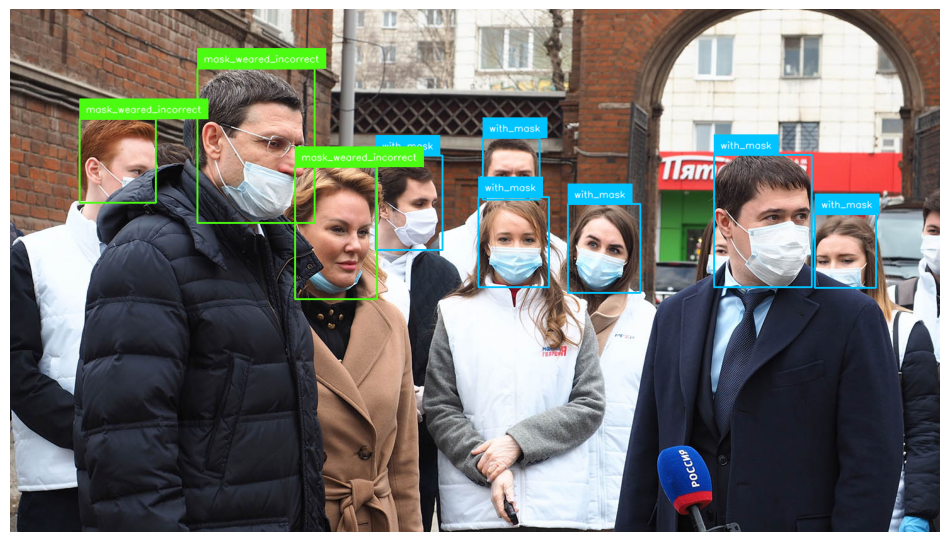

In [ ]:
import supervision as sv
from PIL import Image
# load the results into the supervision Detections api
image = Image.open("your_image.jpg")
detections = sv.Detections.from_inference(result)

# create supervision annotators
bounding_box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

# annotate the image with our inference results
annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

# display the image
sv.plot_image(annotated_image)